In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

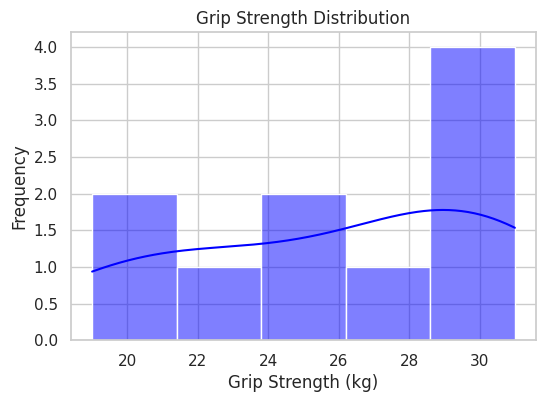

<ipython-input-6-9b2752467111>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Frailty"], y=data["Grip Strength"], palette="Set2")


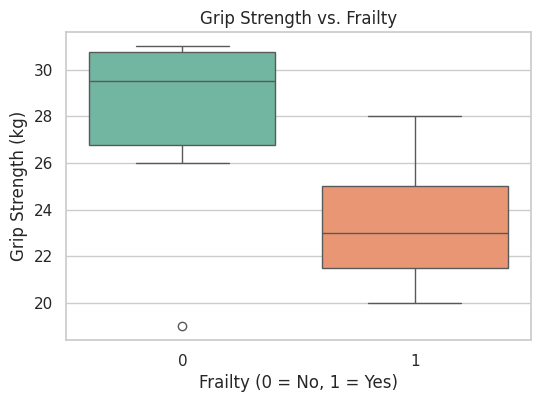

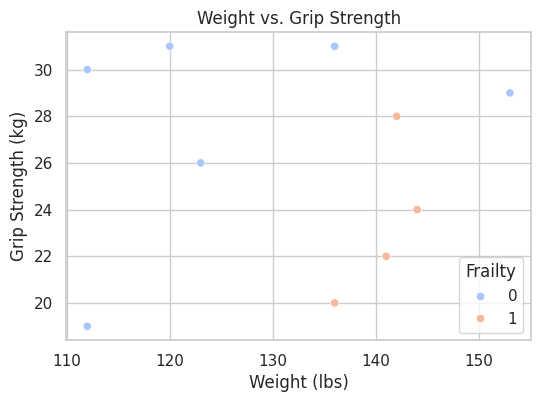

<ipython-input-6-9b2752467111>:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data["Age Group"], y=data["Grip Strength"], ci=None, palette="viridis")
<ipython-input-6-9b2752467111>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Age Group"], y=data["Grip Strength"], ci=None, palette="viridis")


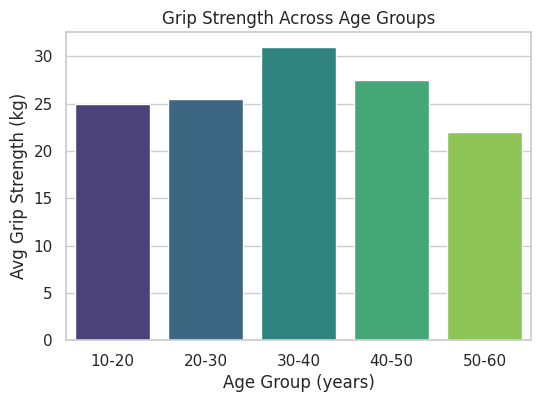

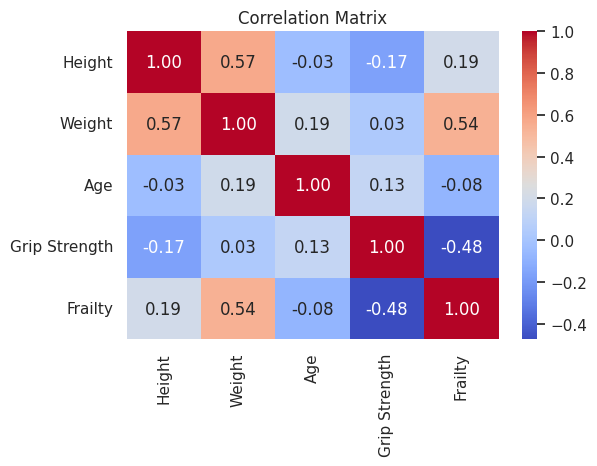

In [ ]:


# Load cleaned data
cleaned_file = "cleaned_datA.csv"
data = pd.read_csv(cleaned_file)

# Summary Statistics
summary_stats = data.describe()
summary_stats.to_csv("statistical_summary.txt", sep="\t")

# Set plot style
sns.set_theme(style="whitegrid")

# Histogram: Grip Strength Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data["Grip Strength"], bins=5, kde=True, color="blue")
plt.xlabel("Grip Strength (kg)")
plt.ylabel("Frequency")
plt.title("Grip Strength Distribution")
plt.savefig("grip_strength_histogram.png")
plt.show()

# Boxplot: Grip Strength by Frailty Status
plt.figure(figsize=(6, 4))
sns.boxplot(x=data["Frailty"], y=data["Grip Strength"], palette="Set2")
plt.xlabel("Frailty (0 = No, 1 = Yes)")
plt.ylabel("Grip Strength (kg)")
plt.title("Grip Strength vs. Frailty")
plt.savefig("frailty_boxplot.png")
plt.show()

# Scatter Plot: Weight vs Grip Strength
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data["Weight"], y=data["Grip Strength"], hue=data["Frailty"], palette="coolwarm")
plt.xlabel("Weight (lbs)")
plt.ylabel("Grip Strength (kg)")
plt.title("Weight vs. Grip Strength")
plt.savefig("weight_vs_grip_scatter.png")
plt.show()

# Bar Chart: Average Grip Strength by Age Group
data["Age Group"] = pd.cut(data["Age"], bins=[10, 20, 30, 40, 50, 60], labels=["10-20", "20-30", "30-40", "40-50", "50-60"])
plt.figure(figsize=(6, 4))
sns.barplot(x=data["Age Group"], y=data["Grip Strength"], ci=None, palette="viridis")
plt.xlabel("Age Group (years)")
plt.ylabel("Avg Grip Strength (kg)")
plt.title("Grip Strength Across Age Groups")
plt.savefig("age_group_bar_chart.png")
plt.show()


# Correlation Heatmap (Fix: Exclude Non-Numeric Columns)
plt.figure(figsize=(6, 4))

# Selecting only numeric columns
numeric_data = data.select_dtypes(include=["number"])

# Compute and plot the correlation matrix
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig("correlation_heatmap.png")
plt.show()

